# **Predictive Modeling for Personalized Diabetes Care Using Diabetes Health Indicators Data**

### **Dataset Description**

**Diabetes_binary (Target):** Binary variable indicating the presence of diabetes.

0: No diabetes
1: Prediabetes or diabetic

**HighBP:** Binary variable indicating the presence of high blood pressure.

0: No high blood pressure
1: High blood pressure

**HighChol:** Binary variable indicating the presence of high cholesterol.

0: No high cholesterol
1: High cholesterol

**CholCheck:** Binary variable indicating whether the individual had a cholesterol check in the last 5 years.

0: No cholesterol check in 5 years
1: Yes, cholesterol check in 5 years

**BMI:** Integer representing Body Mass Index, a measure of body fat based on height and weight.

**Smoker:** Binary variable indicating whether the individual has smoked at least 100 cigarettes in their entire life.

0: No
1: Yes

**Stroke:** Binary variable indicating whether the individual has ever been told they had a stroke.

0: No
1: Yes

**HeartDiseaseorAttack:** Binary variable indicating the presence of coronary heart disease (CHD) or myocardial infarction (MI).

0: No
1: Yes

**PhysActivity:** Binary variable indicating physical activity in the past 30 days (excluding job-related activity).

0: No
1: Yes

**Fruits:** Binary variable indicating whether the individual consumes fruit 1 or more times per day.

0: No
1: Yes

**Veggies:** Binary variable indicating whether the individual consumes vegetables 1 or more times per day.

0: No
1: Yes

**HvyAlcoholConsump:** Binary variable indicating heavy alcohol consumption.

0: No
1: Yes (for adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

**AnyHealthcare:** Binary variable indicating whether the individual has any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.

0: No
1: Yes

**NoDocbcCost:** Binary variable indicating whether there was a time in the past 12 months when the individual needed to see a doctor but could not because of cost.

0: No
1: Yes

**GenHlth:** Integer representing the individual's general health rating on a scale of 1-5.

1: Excellent
2: Very good
3: Good
4: Fair
5: Poor

**MentHlth:** Integer representing the number of days during the past 30 days when the individual's mental health was not good (scale 1-30 days).

**PhysHlth:** Integer representing the number of days during the past 30 days when the individual's physical health was not good (scale 1-30 days).

**DiffWalk:** Binary variable indicating whether the individual has serious difficulty walking or climbing stairs.

0: No
1: Yes

**Sex:** Binary variable indicating the individual's gender.

0: Female
1: Male

**Age:** Integer representing the individual's age category based on a 13-level scale.

**Education:** Integer representing the individual's education level on a scale of 1-6

**Income:** Integer representing the individual's income scale on a scale of 1-8.

1: Less than $10,000

5: Less than $35,000

8: $75,000 or more

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data = pd.read_csv('diabetes.csv')
data.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


In [41]:
data.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [43]:
print(data.describe())

       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       25.000000   

In [44]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [45]:
duplicates = data[data.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  1635


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
602,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
689,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
891,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
1092,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
1326,0.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,5.0,6.0


In [46]:
data.drop_duplicates(inplace = True)

##Title: Simple distribution for each Attribute

array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

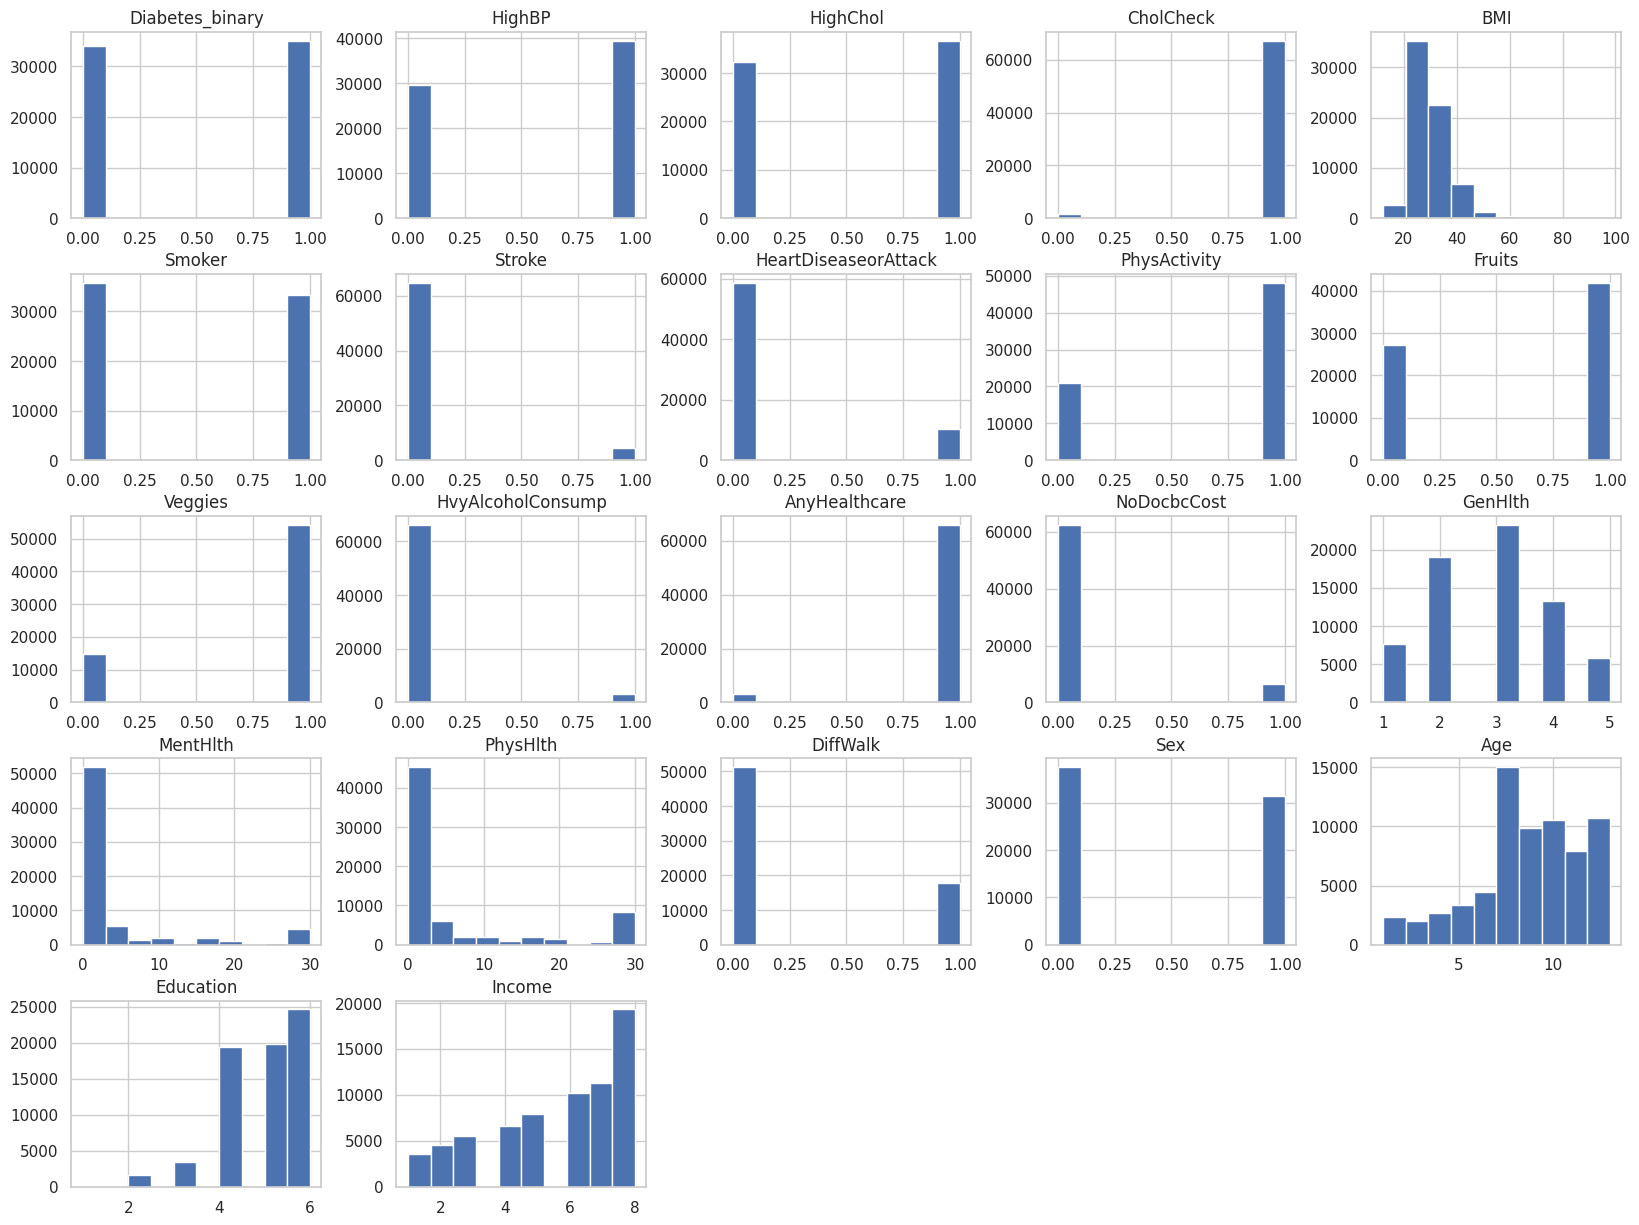

In [47]:
data.hist(figsize=(20,15))

##Title: Correlation Matrix

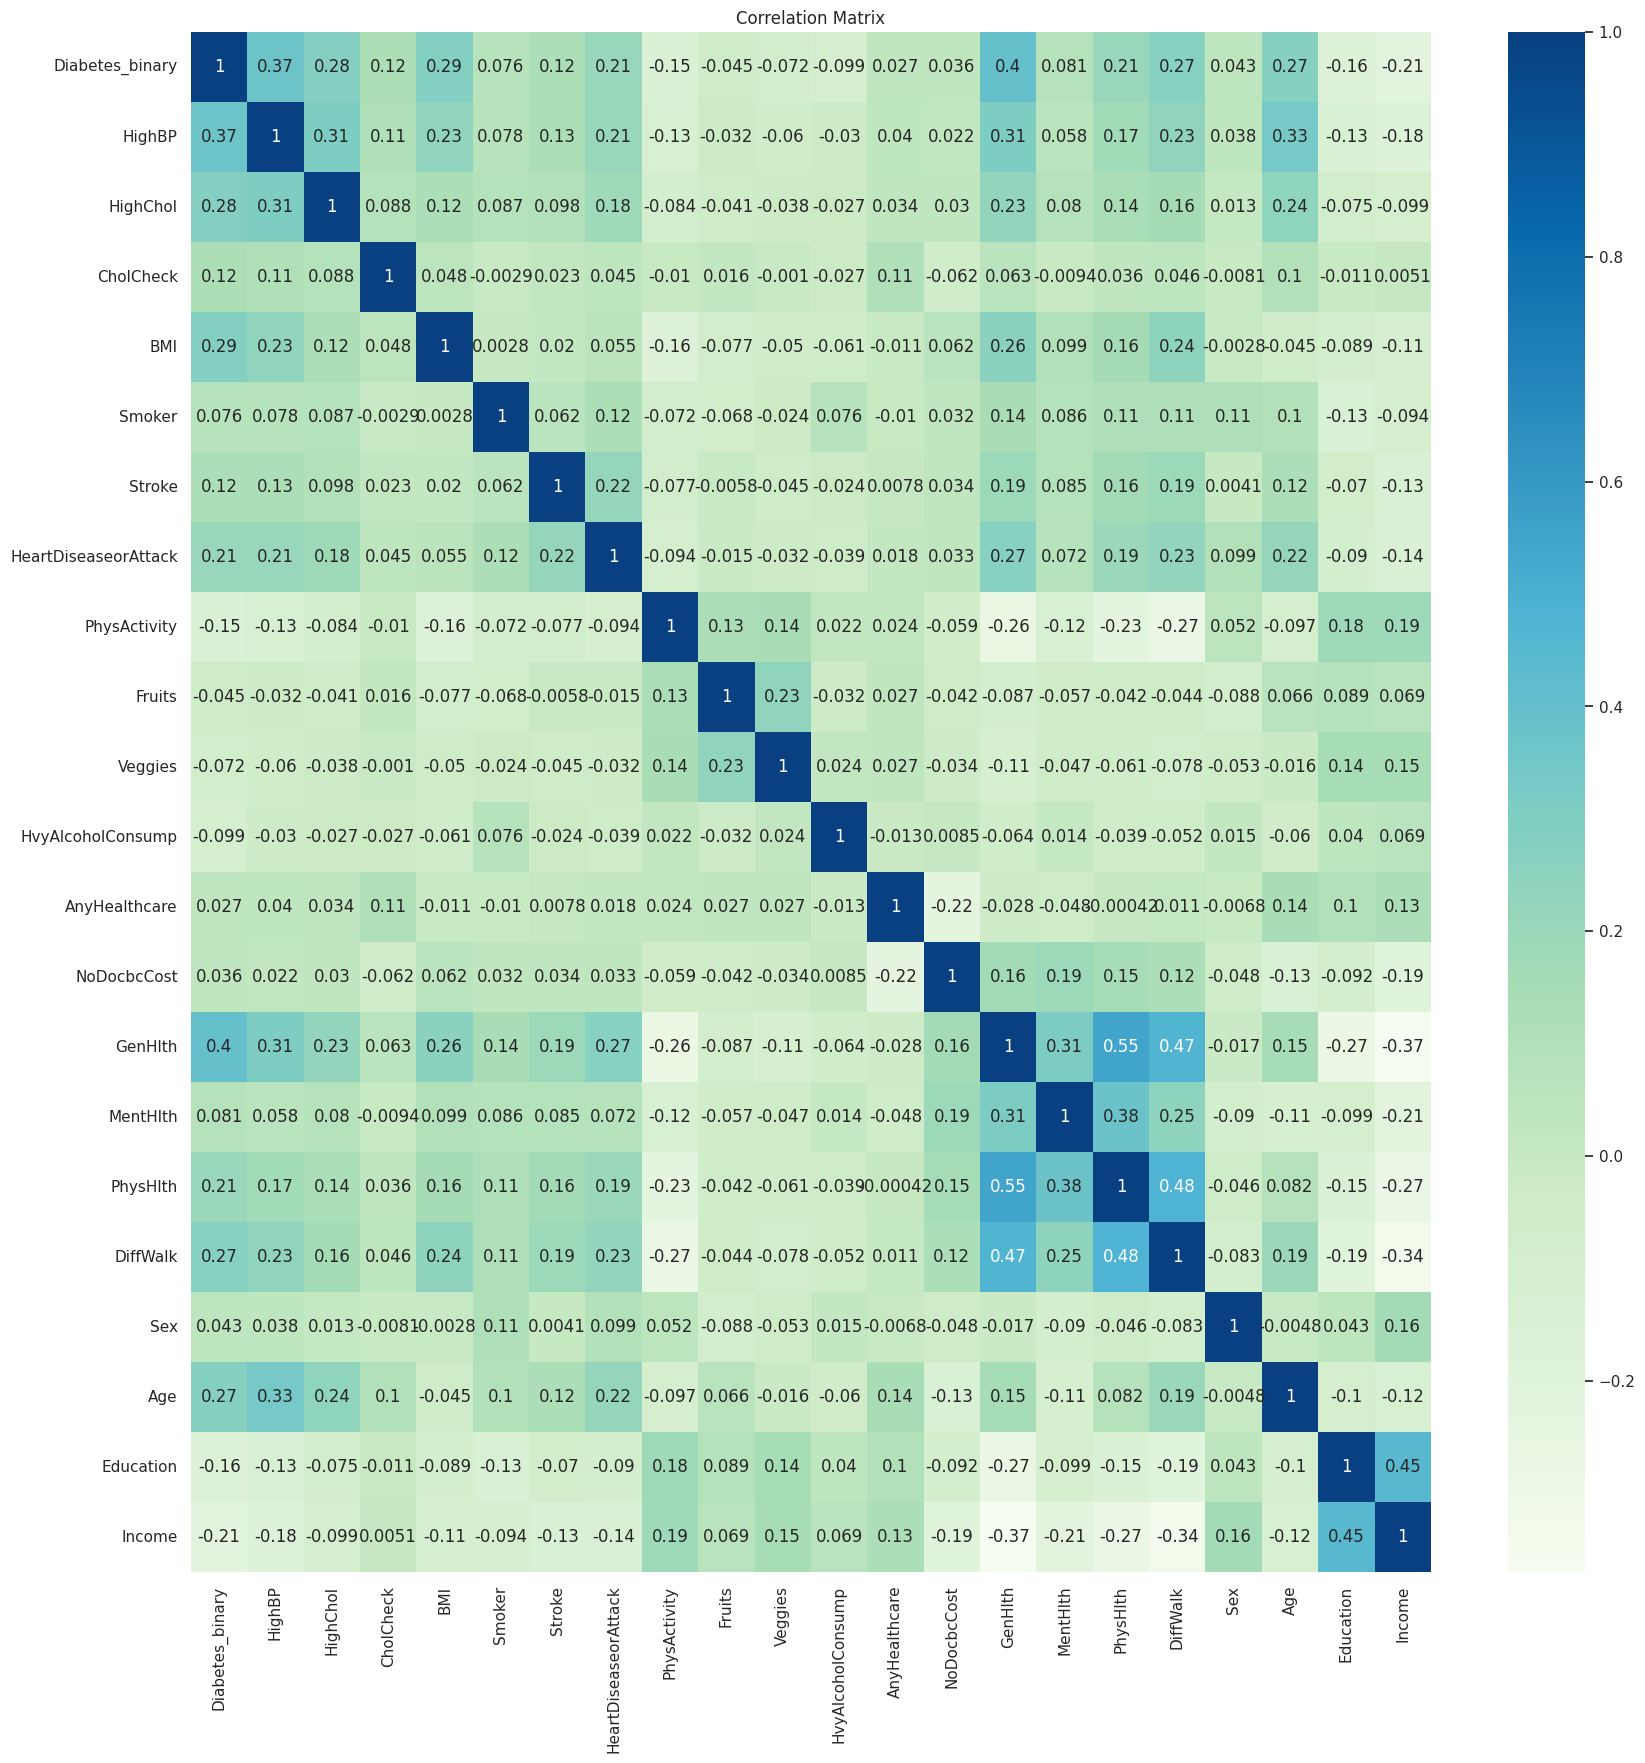

In [48]:
correlation_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu')
plt.title('Correlation Matrix')
plt.show()

##Title: Count plot of people
Graph: The graph shows the distribution of diabetes classes in the population. The x-axis shows the diabetes class, which is a binary variable that indicates whether or not someone has diabetes. The y-axis shows the number of people

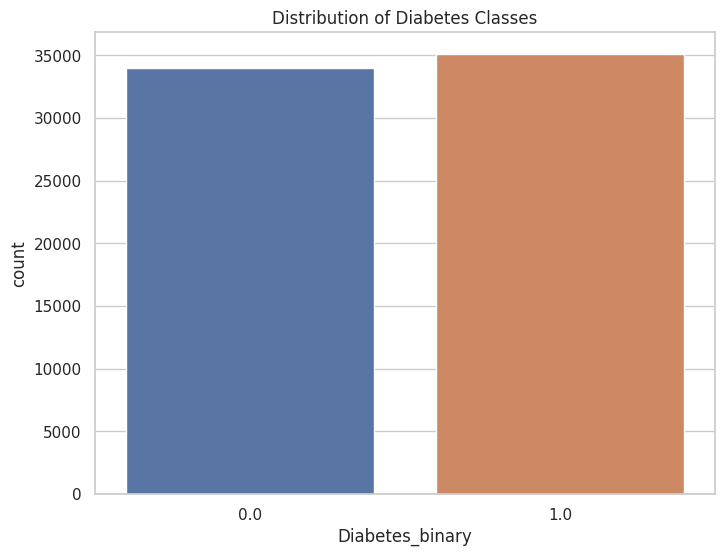

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', data = data)
plt.title('Distribution of Diabetes Classes')
plt.show()

###Correlation between factors and the risk of diabetes being diagnosed
The factors with the highest absolute correlation with diabetes risk are: BMI, GenHlth, HighBP, HighChol

The factors with the weaker correlation with diabetes risk are: Fruits, Sex and Veggies


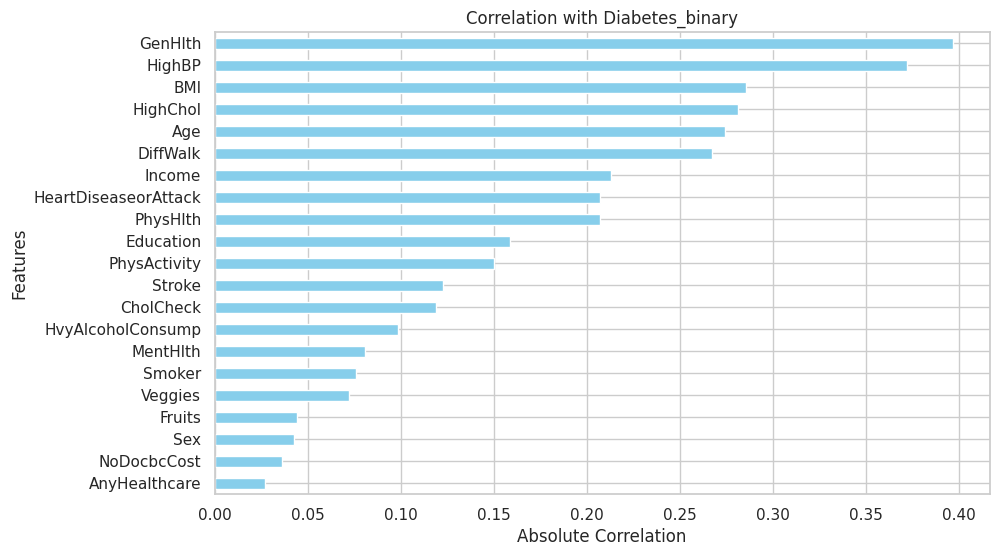

In [50]:
target_variable = 'Diabetes_binary'
correlation_with_target = correlation_matrix[target_variable].drop(target_variable)

# Bar graph for correlations with the target variable
plt.figure(figsize=(10, 6))
correlation_with_target.abs().sort_values().plot(kind='barh', color='skyblue')
plt.title(f'Correlation with {target_variable}')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')
plt.show()

##Title: Plot of General Health (GenHlth) by Diabetes Class

Graph: The graph is a bar chart that shows the number of people with diabetes by their general health ratings. The x-axis shows the general health ratings, which range from 1.0 (excellent) to 5.0 (poor). The y-axis shows the number of people.

Interpretation: The highest number of people with diabetes have a general health rating of 3.0 (good). The number of people with diabetes decreases as the general health rating increases.

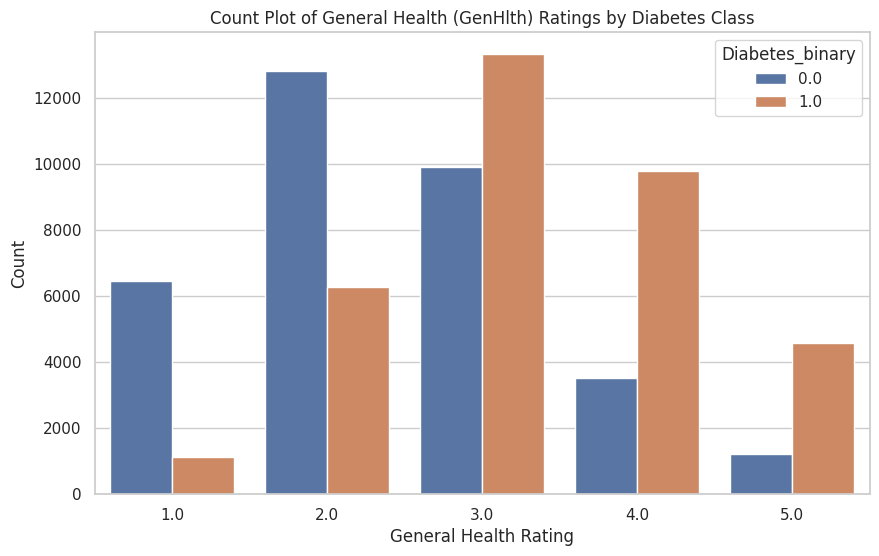

In [51]:
# Count Plot for 'GenHlth'
plt.figure(figsize=(10, 6))
sns.countplot(x='GenHlth', hue='Diabetes_binary', data=data)
plt.title('Count Plot of General Health (GenHlth) Ratings by Diabetes Class')
plt.xlabel('General Health Rating')
plt.ylabel('Count')
plt.show()

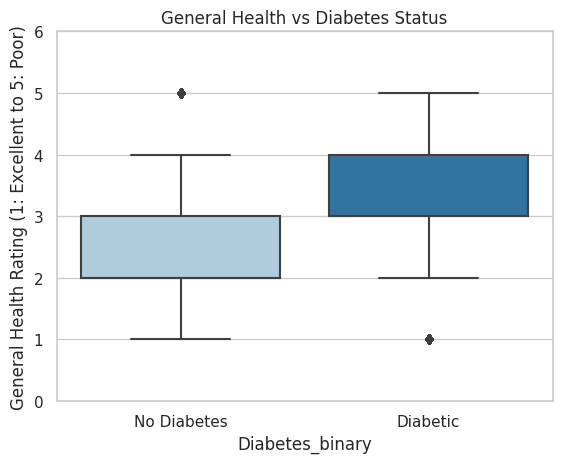

In [52]:
ax = sns.boxplot(data=data, x='Diabetes_binary', y='GenHlth', palette='Paired')
ax.set(title='General Health vs Diabetes Status')
ax.set_xticklabels(['No Diabetes', 'Diabetic'])
plt.ylim(0, 6)
plt.ylabel('General Health Rating (1: Excellent to 5: Poor)')
plt.show()

##Title: Count of high blood pressure by diabetes class
Graph: The graph is a bar chart that shows the number of people with diabetes with High Blood Pressure. The x-axis of the graph shows the diabetes class, which is a binary variable that indicates whether or not someone has diabetes. The y-axis of the graph shows the count.

Interpretation: The graph shows that there is a higher proportion of people with high blood pressure in the diabetes class than in the non-diabetes class.

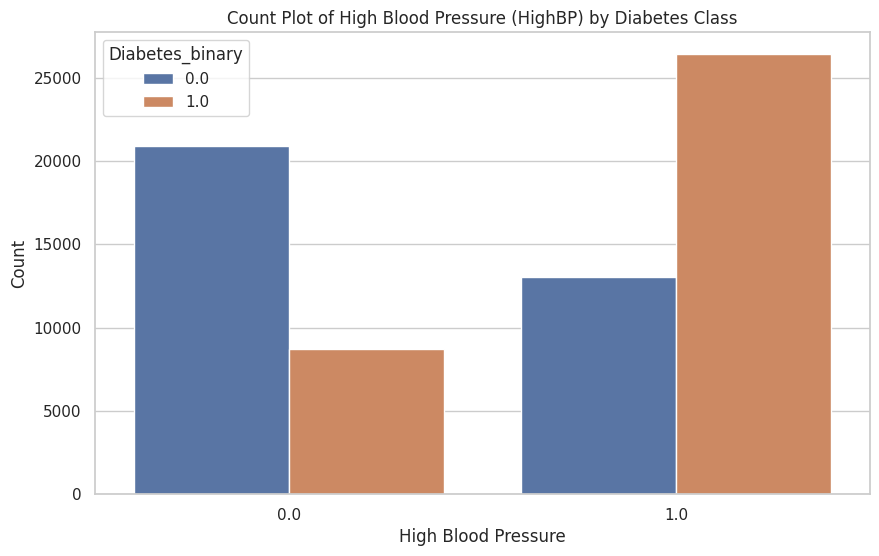

In [53]:
# Count Plot for 'HighBP'
plt.figure(figsize=(10, 6))
sns.countplot(x='HighBP', hue='Diabetes_binary', data=data)
plt.title('Count Plot of High Blood Pressure (HighBP) by Diabetes Class')
plt.xlabel('High Blood Pressure')
plt.ylabel('Count')
plt.show()

##Title: Percentage of People with High Blood Pressure by Diabetes Class
Interpretation: The graph shows that 57.12% of people with diabetes have high blood pressure, compared to 42.88% of people without diabetes.


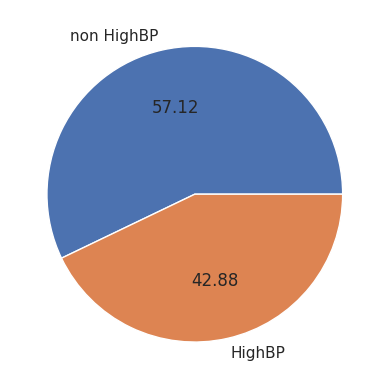

In [54]:
labels=["non HighBP","HighBP"]

plt.pie(data["HighBP"].value_counts() , labels =labels ,autopct='%.02f' );

In [55]:
# Define BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obesity'

# Create a new column 'BMI_Category'
data['BMI_Category'] = data['BMI'].apply(categorize_bmi)


##Tile: Plot of BMI by Diabetes calss
Graph: The graph is a bar chart that shows th number of peope with diabetes by their BMI. The x-axis shows the categorized BMI. The y-axis shows the number of people.

Interpretation: The highest number of people with diabetes are obese according to the categorized BMI.

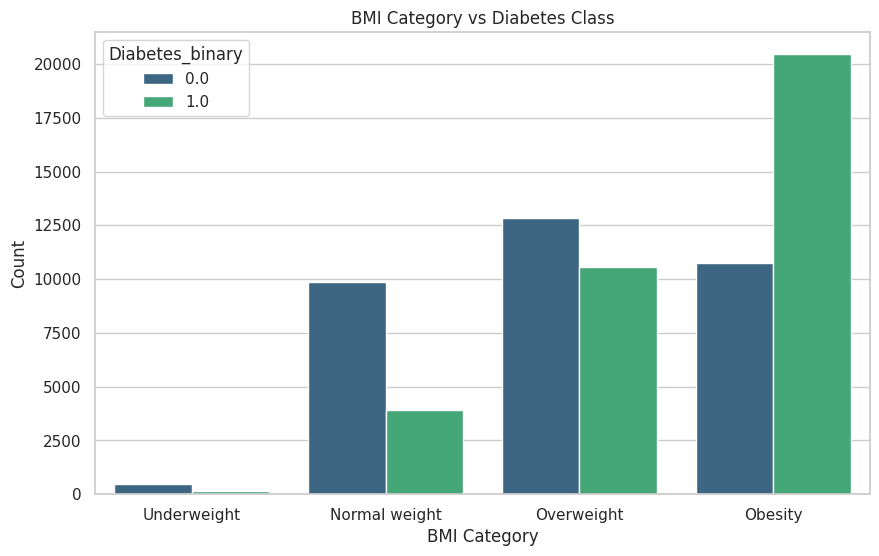

In [56]:
# Bar Plot for 'BMI_Category' vs Diabetes Class
plt.figure(figsize=(10, 6))
sns.countplot(x='BMI_Category', hue='Diabetes_binary', data=data, order=['Underweight', 'Normal weight', 'Overweight', 'Obesity'], palette='viridis')
plt.title('BMI Category vs Diabetes Class')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

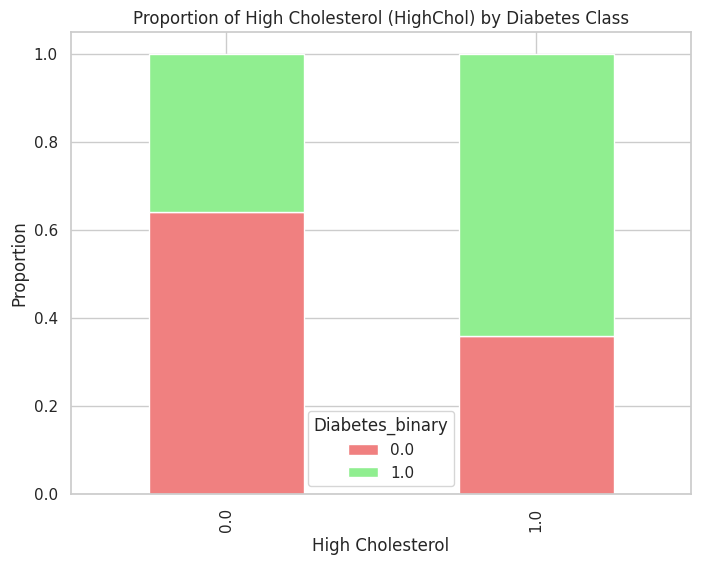

In [57]:
highchol_crosstab = pd.crosstab(data['HighChol'], data['Diabetes_binary'], normalize='index')
highchol_crosstab.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen', 'skyblue'], figsize=(8, 6))
plt.title('Proportion of High Cholesterol (HighChol) by Diabetes Class')
plt.xlabel('High Cholesterol')
plt.ylabel('Proportion')
plt.show()

##Title: Count plot of diabetes class by age group
Graph: The graph is a bar chart that shows th number of peope in each age group(divided into 13 level category) with diabetes. The x-axis shows the categorized age. The y-axis shows the number of people.

Interpretation: The graph shows that the number of people with diabetes increases with age. The highest number of people with diabetes are in the age group 65-69 years old. This is followed by the age groups 60-64 years old and 70-74 years old.

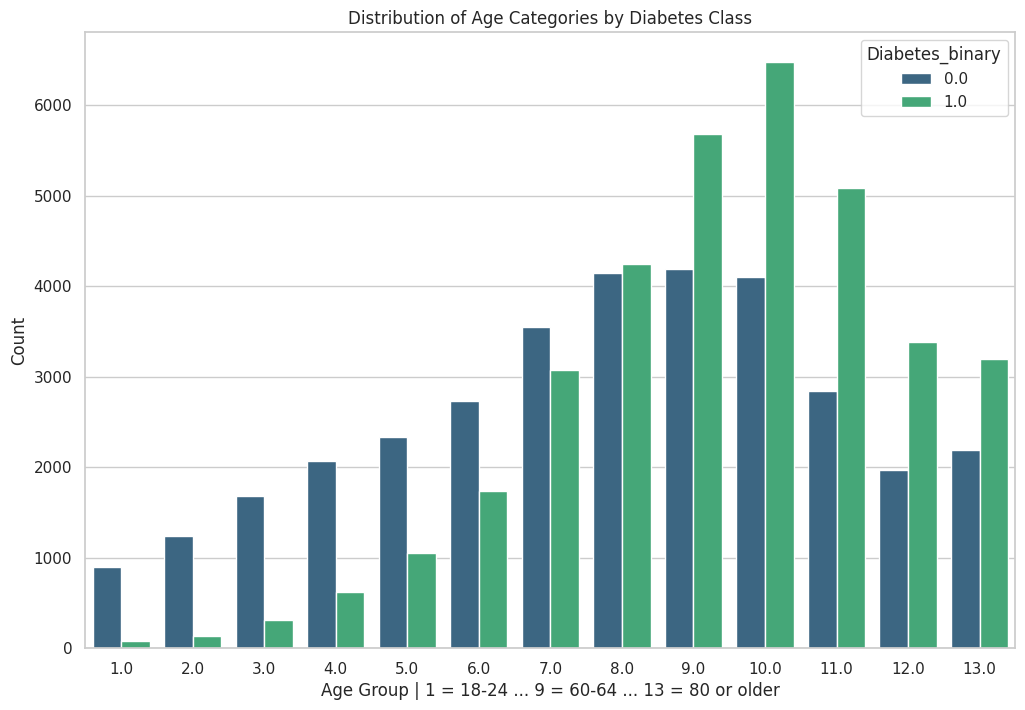

In [58]:
sns.set(style="whitegrid")

# Create a count plot of age categories by diabetes class
plt.figure(figsize=(12, 8))
sns.countplot(x='Age', hue='Diabetes_binary', data=data, palette='viridis')

plt.title('Distribution of Age Categories by Diabetes Class')
plt.xlabel('Age Group | 1 = 18-24 ... 9 = 60-64 ... 13 = 80 or older')
plt.ylabel('Count')

plt.show()


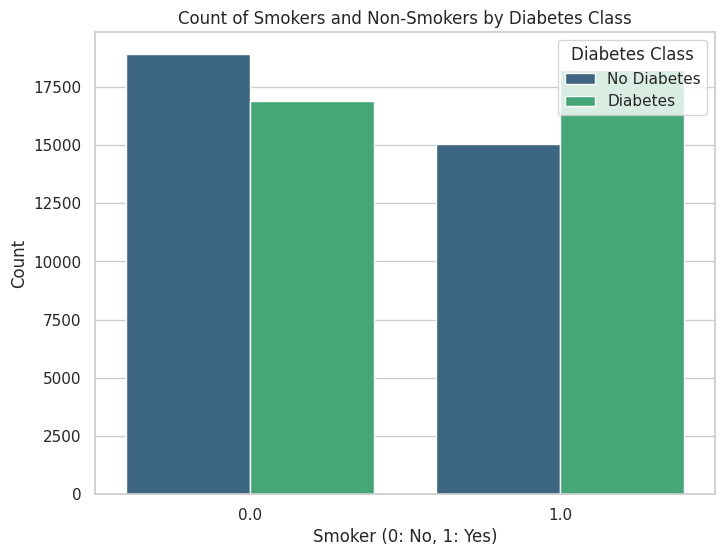

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoker', hue='Diabetes_binary', data=data, palette='viridis')
plt.title('Count of Smokers and Non-Smokers by Diabetes Class')
plt.xlabel('Smoker (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Diabetes Class', labels=['No Diabetes', 'Diabetes'])
plt.show()

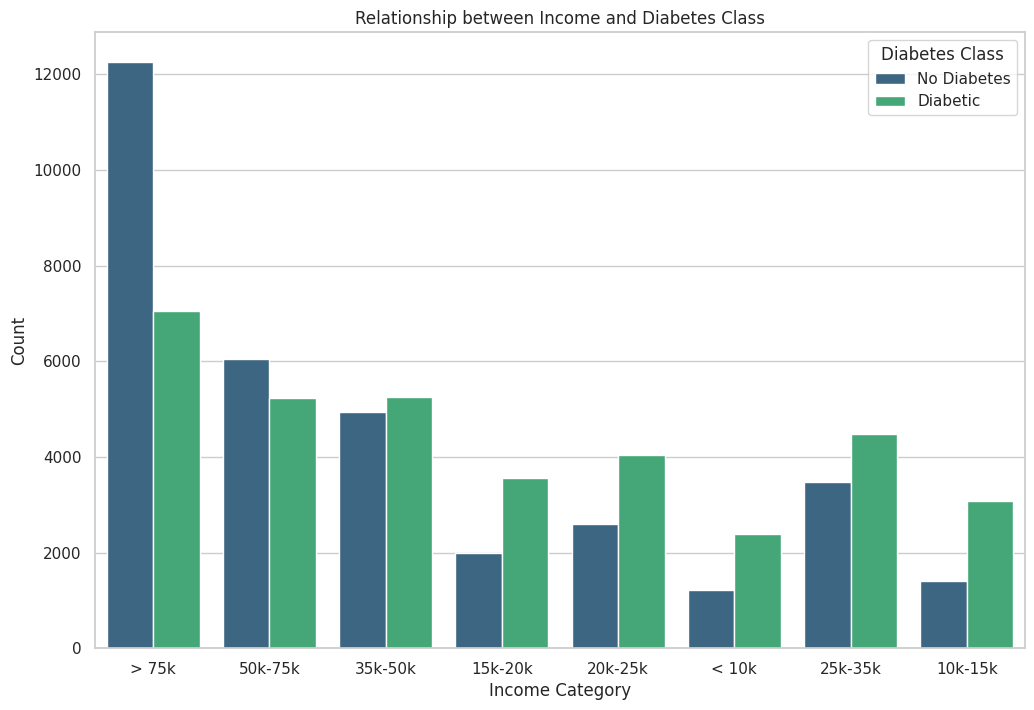

In [60]:
income_categories = {
    1: '< 10k',
    2: '10k-15k',
    3: '15k-20k',
    4: '20k-25k',
    5: '25k-35k',
    6: '35k-50k',
    7: '50k-75k',
    8: '> 75k'
}

# Map the income categories to the 'Income' column
data['Income_Category'] = data['Income'].map(income_categories)

sns.set(style="whitegrid")

# Grouped Bar Plot for 'Income_Category' vs Diabetes Class
plt.figure(figsize=(12, 8))
sns.countplot(x='Income_Category', hue='Diabetes_binary', data=data, palette='viridis')
plt.title('Relationship between Income and Diabetes Class')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.legend(title='Diabetes Class', loc='upper right', labels=['No Diabetes', 'Diabetic'])
plt.show()

In [62]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Selecting features and target variable
X = data.drop(['Diabetes_binary', 'CholCheck', 'PhysActivity', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'Education'], axis=1)  # Features
y = data['Diabetes_binary']  # Target variable

# Separating numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Creating transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Creating a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Transforming the data
X_processed = preprocessor.fit_transform(X)

columns = numerical_cols.tolist() + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
X_processed_df = pd.DataFrame(X_processed, columns=columns)

# Displaying the processed data
print(X_processed_df.head())

     HighBP  HighChol       BMI    Smoker    Stroke  HeartDiseaseorAttack  \
0  0.866388 -1.064751 -0.553424 -0.964500 -0.260708             -0.421525   
1  0.866388  0.939187 -0.553424  1.036806  3.835704             -0.421525   
2 -1.154218 -1.064751 -0.553424 -0.964500 -0.260708             -0.421525   
3  0.866388  0.939187 -0.273623  1.036806 -0.260708             -0.421525   
4 -1.154218 -1.064751 -0.133722  1.036806 -0.260708             -0.421525   

     Fruits   Veggies  HvyAlcoholConsump   GenHlth  ...  BMI_Category_Obesity  \
0 -1.239305  0.524704          -0.213294  0.123028  ...                   0.0   
1  0.806904 -1.905836          -0.213294  0.123028  ...                   0.0   
2  0.806904  0.524704          -0.213294 -1.682121  ...                   0.0   
3  0.806904  0.524704          -0.213294  0.123028  ...                   0.0   
4  0.806904  0.524704          -0.213294 -0.779546  ...                   0.0   

   BMI_Category_Overweight  BMI_Category_Underweig

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Display the shape of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (55245, 25)
Shape of X_test: (13812, 25)
Shape of y_train: (55245,)
Shape of y_test: (13812,)


**Support Vector Machines (SVM)**

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create an SVM classifier with specified hyperparameters
svm_classifier = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm:.3f}")

# Display classification report and confusion matrix
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

Accuracy (SVM): 0.752

Classification Report (SVM):
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      6723
         1.0       0.74      0.81      0.77      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812



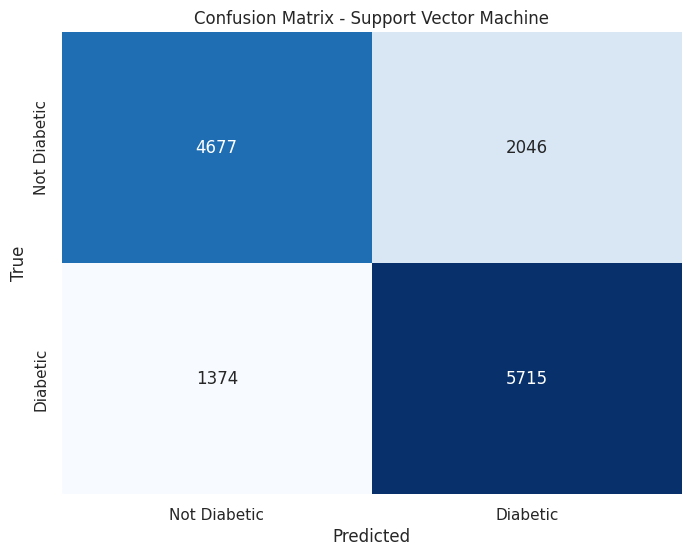

In [65]:
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Diabetic', 'Diabetic'],
            yticklabels=['Not Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Random Forest Classifier**

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Random Forest classifier with specified hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf:.3f}")

# Display classification report and confusion matrix
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Accuracy (Random Forest): 0.725

Classification Report (Random Forest):
              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71      6723
         1.0       0.72      0.76      0.74      7089

    accuracy                           0.72     13812
   macro avg       0.72      0.72      0.72     13812
weighted avg       0.72      0.72      0.72     13812



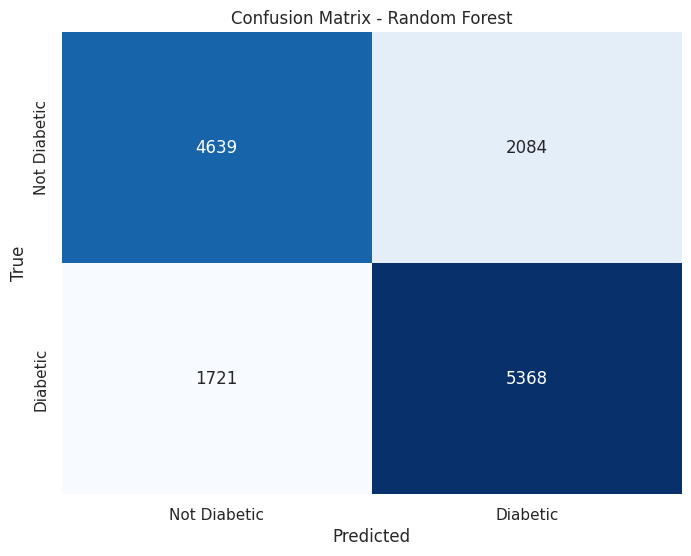

In [67]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Diabetic', 'Diabetic'],
            yticklabels=['Not Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Logistic Regression**

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression model
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy (Multinomial Logistic Regression): {accuracy_logreg:.3f}")

# Display classification report and confusion matrix
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

Accuracy (Multinomial Logistic Regression): 0.752

Classification Report (Multinomial Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      6723
         1.0       0.75      0.78      0.76      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812



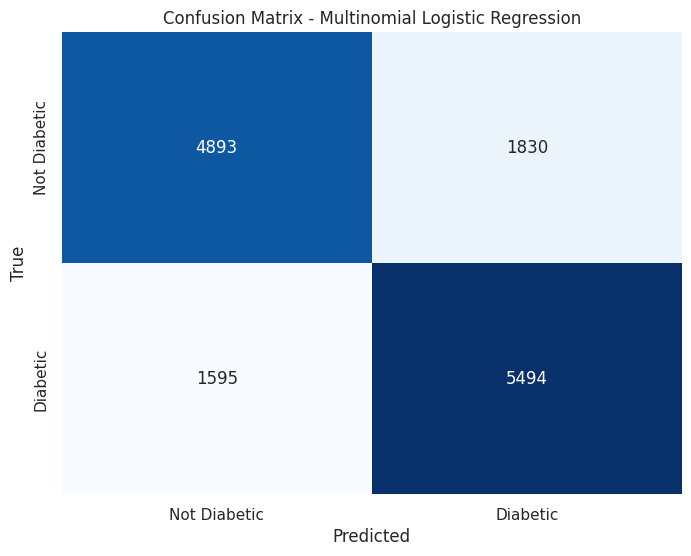

In [69]:
cm_rf = confusion_matrix(y_test, y_pred_logreg)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Diabetic', 'Diabetic'],
            yticklabels=['Not Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

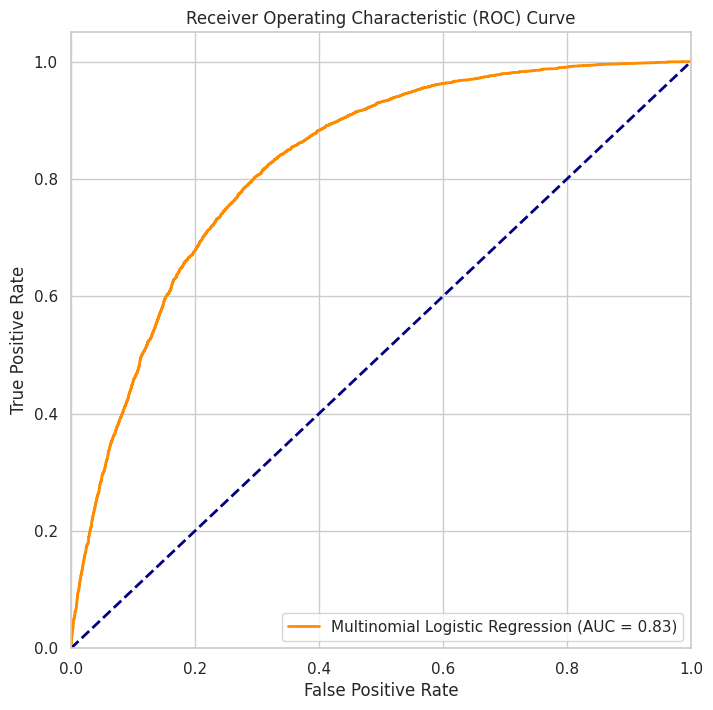

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_logreg = logreg_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Artificial Neural Network (ANN)**

In [92]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.25)

# Predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy_ann = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_ann * 100:.2f}%')

Epoch 1/50
648/648 [==============================] - 3s 3ms/step - loss: 0.5448 - accuracy: 0.7271 - val_loss: 0.5284 - val_accuracy: 0.7362
Epoch 2/50
648/648 [==============================] - 2s 4ms/step - loss: 0.5250 - accuracy: 0.7408 - val_loss: 0.5277 - val_accuracy: 0.7356
Epoch 3/50
648/648 [==============================] - 3s 4ms/step - loss: 0.5222 - accuracy: 0.7449 - val_loss: 0.5256 - val_accuracy: 0.7366
Epoch 4/50
648/648 [==============================] - 2s 3ms/step - loss: 0.5192 - accuracy: 0.7453 - val_loss: 0.5246 - val_accuracy: 0.7380
Epoch 5/50
648/648 [==============================] - 2s 3ms/step - loss: 0.5179 - accuracy: 0.7471 - val_loss: 0.5255 - val_accuracy: 0.7367
Epoch 6/50
648/648 [==============================] - 2s 3ms/step - loss: 0.5159 - accuracy: 0.7479 - val_loss: 0.5255 - val_accuracy: 0.7364
Epoch 7/50
648/648 [==============================] - 2s 3ms/step - loss: 0.5152 - accuracy: 0.7473 - val_loss: 0.5251 - val_accuracy: 0.7367
Epoch 

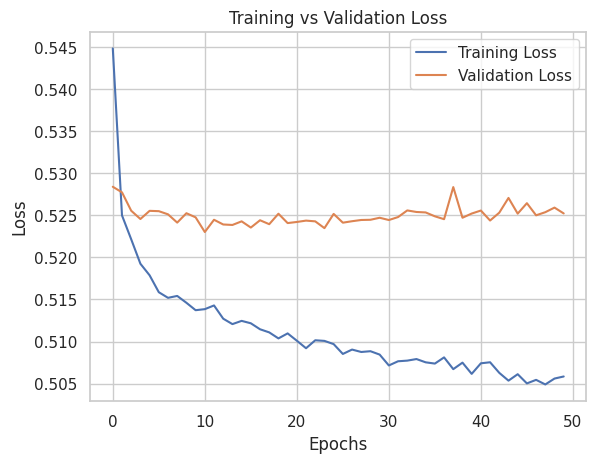

In [95]:
# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

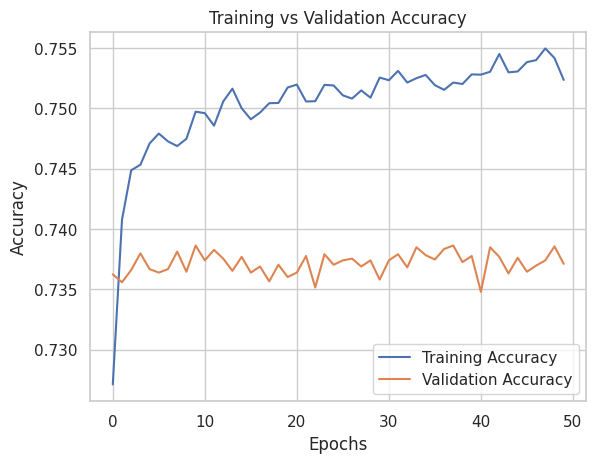

In [96]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

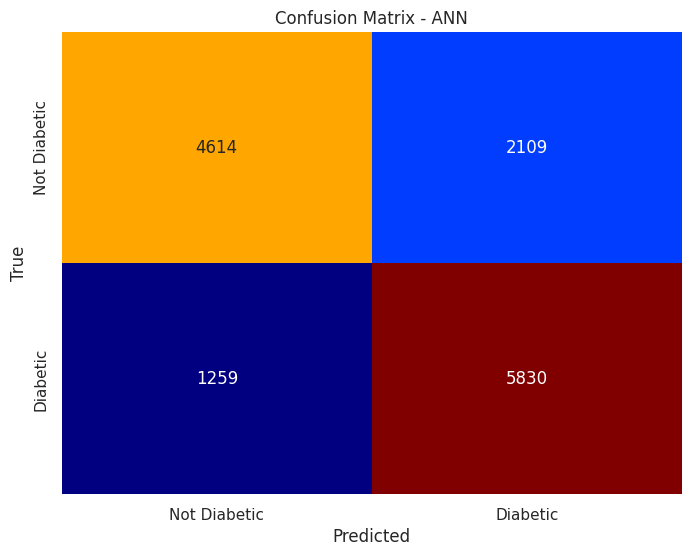

In [99]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='jet', cbar=False,
            xticklabels=['Not Diabetic', 'Diabetic'],
            yticklabels=['Not Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - ANN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**XGBoost Classifier**

In [74]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy_xgb * 100:.3f}%')

# Display classification
print("\nClassification Report (XGBoost Classifier):")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 75.224%

Classification Report (XGBoost Classifier):
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.74      6723
         1.0       0.74      0.79      0.77      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812



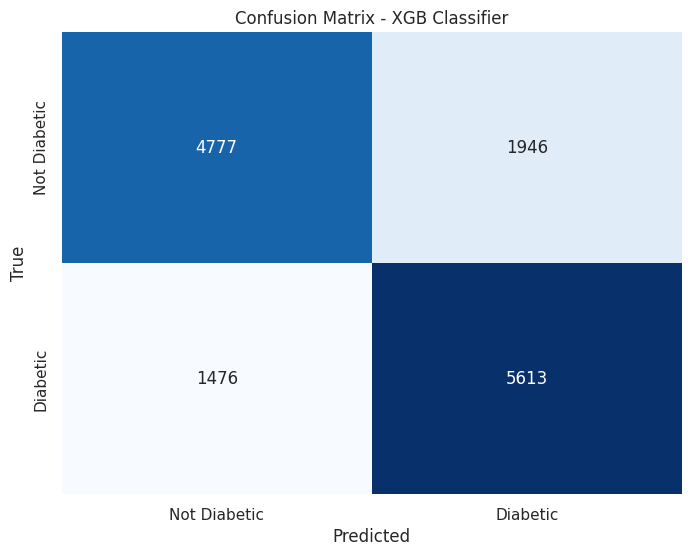

In [75]:
# Create a confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Diabetic', 'Diabetic'],
            yticklabels=['Not Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - XGB Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Voting Classifier**

In [76]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(
    estimators=[
        ('svm', svm_classifier),
        ('random_forest', rf_classifier),
        ('xgboost', xgb),
        ('logistic_regression', logreg_model)
    ],
    voting='hard'
)

# Fit the Voting Classifier on the training data
voting_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = voting_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 75.14%


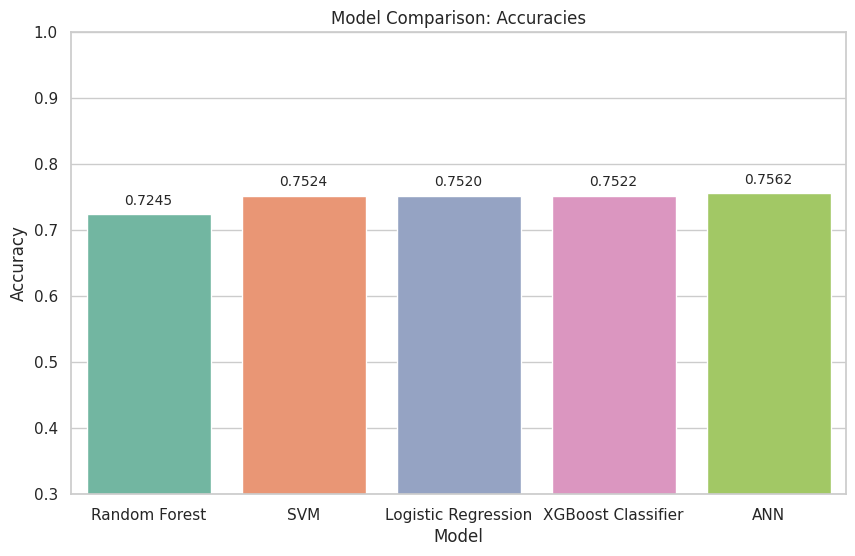

In [100]:
# Create a DataFrame for easier plotting
accuracy_df = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'XGBoost Classifier', 'ANN'],
    'Accuracy': [accuracy_rf, accuracy_svm, accuracy_logreg, accuracy_xgb, accuracy_ann,]
})

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='Set2')
for index, value in enumerate(accuracy_df['Accuracy']):
    bar_plot.text(index, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=10)
plt.title('Model Comparison: Accuracies')
plt.ylim(0.3, 1)
plt.ylabel('Accuracy')
plt.show()